## EDA Analysis

## Day 001 – EDA on Soil Nutrient Pools Dataset

**Problem:**  
Explored soil nutrient pool sensitivity data to understand distributions, variability, and relationships between key environmental variables.


**import packages**

In [1]:
import pandas as pd  # to load datasets,understand data shape, quality, and transformations
import numpy as np  # supports numerical stability and efficient transformations
import matplotlib.pyplot as plt  # Custom plots, formatting, saving figures
import seaborn as sns # Pattern detection, quick insights

In [2]:
# read the data
soil_df = pd.read_csv("Sensitivity_Soil_Nutrient.csv")
soil_df

,SampleID,site,block,paddock,plot,slope,rainfall_reduction,grazing_treatment,year,type,faith_pd
0,GMDR-FK-2018-4,FK,1,1,4,4,0,stable,2018,bacteria,3.912.908.739
1,GMDR-TB-2018-45,TB,3,2,45,2,50,heavy,2018,bacteria,3.298.556.468
2,GMDR-TB-2018-8,TB,1,3,8,1,75,destock,2018,bacteria,3.332.257.877
3,GMDR-TB-2018-31,TB,2,3,31,4,99,destock,2018,bacteria,3.806.342.641
4,GMDR-TB-2018-23,TB,2,2,23,6,0,heavy,2018,bacteria,4.135.953.774
...,...,...,...,...,...,...,...,...,...,...,...
1001,GMDR-FK-2022-23,FK,2,1,23,1,0,destock,2022,fungi,2.229.139.198
1002,GMDR-FK-2022-20,FK,2,1,20,2,0,destock,2022,fungi,1.572.091.467
1003,GMDR-TB-2022-49,TB,3,1,49,4,50,stable,2022,fungi,3.400.527.221
1004,GMDR-FK-2022-52,FK,3,3,52,2,0,heavy,2022,fungi,1.679.936.128


**shape and structure**

In [3]:
print(soil_df.shape)
print(soil_df.columns)

(1006, 11)
Index(['SampleID', 'site', 'block', 'paddock', 'plot', 'slope',
       'rainfall_reduction', 'grazing_treatment', 'year', 'type', 'faith_pd'],
      dtype='object')


In [4]:
soil_df.head()

,SampleID,site,block,paddock,plot,slope,rainfall_reduction,grazing_treatment,year,type,faith_pd
0,GMDR-FK-2018-4,FK,1,1,4,4,0,stable,2018,bacteria,3.912.908.739
1,GMDR-TB-2018-45,TB,3,2,45,2,50,heavy,2018,bacteria,3.298.556.468
2,GMDR-TB-2018-8,TB,1,3,8,1,75,destock,2018,bacteria,3.332.257.877
3,GMDR-TB-2018-31,TB,2,3,31,4,99,destock,2018,bacteria,3.806.342.641
4,GMDR-TB-2018-23,TB,2,2,23,6,0,heavy,2018,bacteria,4.135.953.774


In [5]:
soil_df.dtypes

SampleID              object
site                  object
block                  int64
paddock                int64
plot                   int64
slope                  int64
rainfall_reduction     int64
grazing_treatment     object
year                   int64
type                  object
faith_pd              object
dtype: object

**summary stat**

In [6]:
soil_df.describe()

,block,paddock,plot,slope,rainfall_reduction,year
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,1.997018,2.005964,27.485089,3.037773,41.165010,2019.930417
std,0.817100,0.816475,15.529054,1.569791,36.765529,1.378993
min,1.000000,1.000000,1.000000,1.000000,0.000000,2018.000000
25%,1.000000,1.000000,14.000000,2.000000,0.000000,2019.000000
50%,2.000000,2.000000,27.500000,3.000000,25.000000,2020.000000
75%,3.000000,3.000000,41.000000,4.000000,75.000000,2021.000000
max,3.000000,3.000000,54.000000,6.000000,99.000000,2022.000000


**missing values check**

In [7]:
soil_df.isnull().sum()

SampleID              0
site                  0
block                 0
paddock               0
plot                  0
slope                 0
rainfall_reduction    0
grazing_treatment     0
year                  0
type                  0
faith_pd              0
dtype: int64

In [8]:
num = soil_df.select_dtypes(include='number')
num

,block,paddock,plot,slope,rainfall_reduction,year
0,1,1,4,4,0,2018
1,3,2,45,2,50,2018
2,1,3,8,1,75,2018
3,2,3,31,4,99,2018
4,2,2,23,6,0,2018
...,...,...,...,...,...,...
1001,2,1,23,1,0,2022
1002,2,1,20,2,0,2022
1003,3,1,49,4,50,2022
1004,3,3,52,2,0,2022


**Histogram**

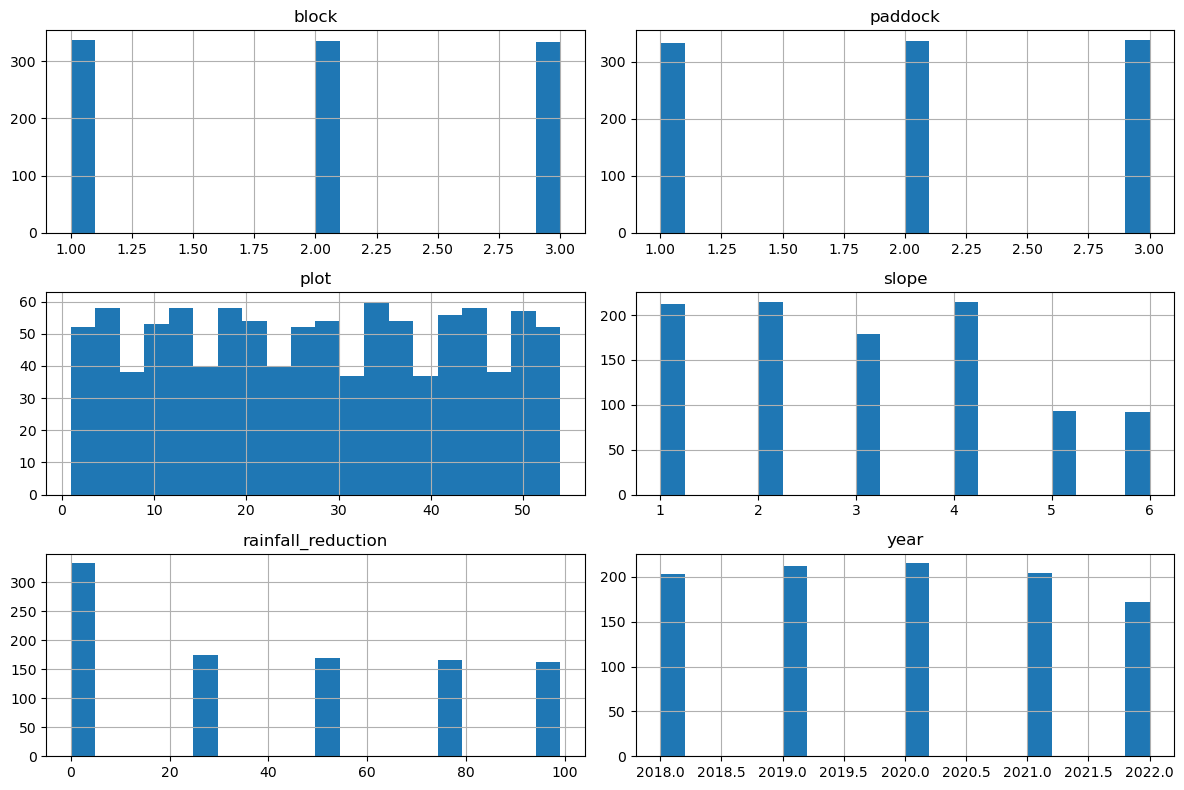

In [9]:
num.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()


In [10]:
cat=soil_df.select_dtypes(include=object).columns
cat

Index(['SampleID', 'site', 'grazing_treatment', 'type', 'faith_pd'], dtype='object')

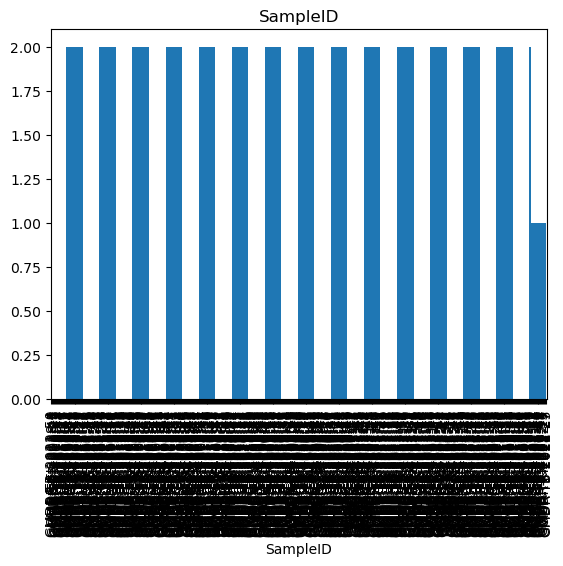

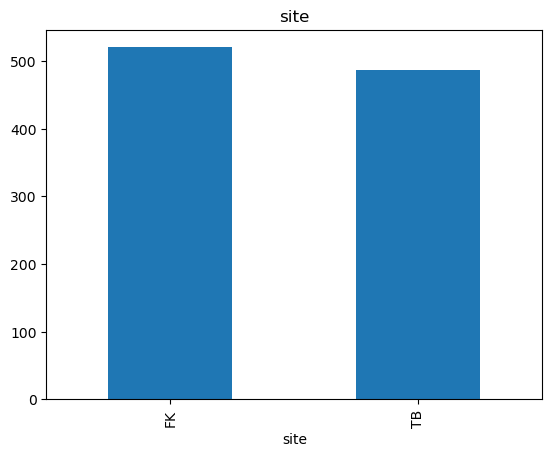

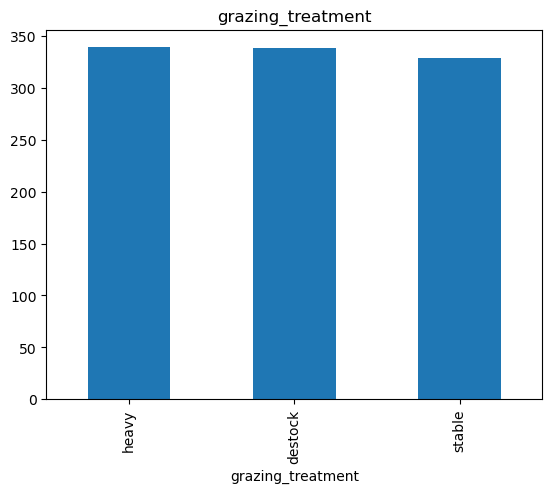

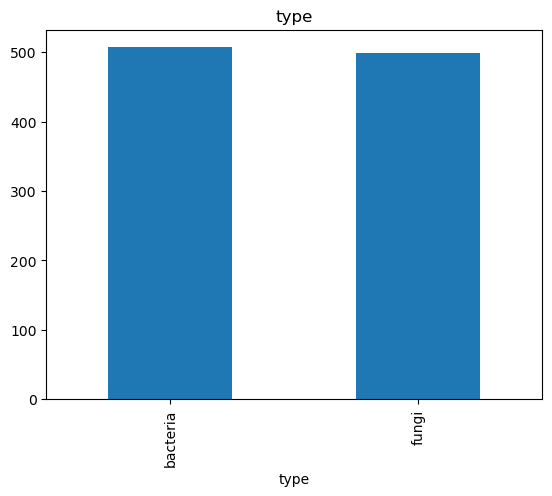

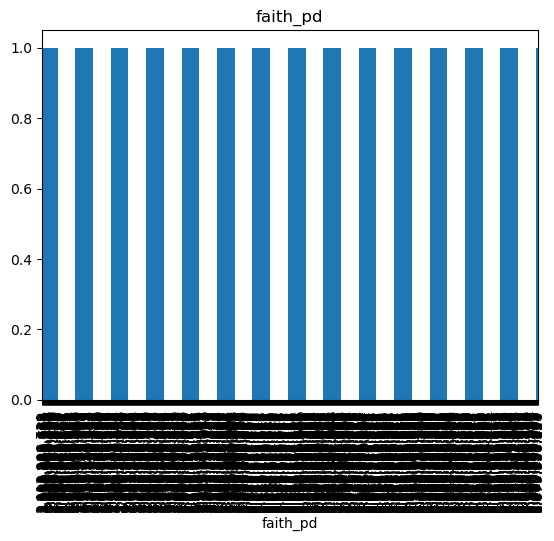

In [11]:
for col in cat:
    soil_df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

In [12]:
soil_df.describe()

,block,paddock,plot,slope,rainfall_reduction,year
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,1.997018,2.005964,27.485089,3.037773,41.165010,2019.930417
std,0.817100,0.816475,15.529054,1.569791,36.765529,1.378993
min,1.000000,1.000000,1.000000,1.000000,0.000000,2018.000000
25%,1.000000,1.000000,14.000000,2.000000,0.000000,2019.000000
50%,2.000000,2.000000,27.500000,3.000000,25.000000,2020.000000
75%,3.000000,3.000000,41.000000,4.000000,75.000000,2021.000000
max,3.000000,3.000000,54.000000,6.000000,99.000000,2022.000000


In [13]:
num = soil_df.select_dtypes(include=np.number)

In [15]:
from scipy.stats import zscore
z_scores = np.abs(zscore(num))
z_scores.max()

np.float64(1.887958493745318)

In [16]:
z_scores = zscore(num)
pd.DataFrame(z_scores, columns=num.columns).abs().max().sort_values(ascending=False)

slope                 1.887958
plot                  1.708288
rainfall_reduction    1.573859
year                  1.501539
paddock               1.232695
block                 1.228100
dtype: float64

**Conclusion**

- The dataset had no missing values. Z-score analysis on numerical features showed all values     within ±3 standard deviations, indicating no significant outliers.
  
- No missing values detected across features.
- Distributions are stable with no extreme outliers.
- Data appears pre-cleaned and suitable for direct modeling.